# Final Project Submission for Mod 4

* Student name: **Andrew Hotchkiss**
* Student pace: **Part time**
* Scheduled project review date/time: 
* Instructor name: **James Irving**
* Blog post URL: https://stones-1130.github.io/

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

> **Assignment:**

> What are the top 5 best Zipcodes to invest in?
Forecast median home prices from Zillow data to make recommendations for the top 5 zip codes to invest in in the United States.

**Approach:** 

> - Narrow the forecast to one city/county in the Zillow data set based on background research
> - Turns out to be Boise, Idaho (Ada County)

**Why Boise, ID?**

> - Since 1991, the median home price in Boise has appreciated 391%
> - Highest national average for  year-to-year median increase in home prices (14.4%)
> - #1 in Livability.com 2019 Top 100 Best Places to Live
> - #1 on Forbes 2020 Hottest Housing Markets
Analyzed Zillow and Redfin data on changes in inventory, days on market, and home prices from 2018-2020
> - #1 best housing market in 2020 Realtor.com study
> - #4 best housing market in 2021 Realtor.com study
Home prices expected to rise 10% in 2021


**Criteria for “Best” Zipcode to invest in: 
Lowest risk based on 5-year forecast for median home prices**


# OBTAIN

#### IMPORT LIBRARIES AND PACKAGES

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

#Project notebook settings
pd.set_option('display.max_columns', 0)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-poster')

In [30]:
# IMPORT THE DATASET
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,...,893000,895000,901200,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,999100,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,...,251400,253000,255200,258000,261200,264700,268400,271400,273600,275200,276400,277000,277900,280000,282600,285400,288400,290800,292000,292800,293700,295200,297000,299000,300800,301800,302800,304400,306200,307000,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,...,301700,302400,303600,306200,309100,311900,314100,316300,319000,322000,324300,326100,327300,327000,327200,328500,329800,330000,329000,327800,326700,325500,324700,324500,323700,322300,320700,320000,320000,320900,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,610100.0,...,1176400,1174600,1178500,1185700,1192900,1198800,1200400,1198900,1200200,1207400,1218600,1226600,1230700,1235400,1241300,1245700,1247000,1246700,1245700,1246000,1247700,1252900,1260900,1267900,1272600,1276600,1280300,1282500,1286000,1289000,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,...,114700,115000,115000,115200,115600,115900,115600,115400,115400,115500,115800,116300,116200,115600,115000,114500,114200,114000,114000,113900,114100,114900,115700,116300,116900,117300,117600,118000,118600,118900,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# EXPLORE

In [31]:
df.shape

(14723, 272)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [33]:
print(df.dtypes)

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object


# SCRUB

In [34]:
#DROP COLUMNS WE DON'T NEED
df.drop(['RegionID', 'SizeRank', 'Metro'], axis=1, inplace=True)

df.head()

,RegionName,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,...,893000,895000,901200,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,999100,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Collin,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,193400.0,193100.0,192700.0,...,251400,253000,255200,258000,261200,264700,268400,271400,273600,275200,276400,277000,277900,280000,282600,285400,288400,290800,292000,292800,293700,295200,297000,299000,300800,301800,302800,304400,306200,307000,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Harris,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,277000.0,283600.0,288500.0,...,301700,302400,303600,306200,309100,311900,314100,316300,319000,322000,324300,326100,327300,327000,327200,328500,329800,330000,329000,327800,326700,325500,324700,324500,323700,322300,320700,320000,320000,320900,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Cook,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,610100.0,618600.0,625600.0,631100.0,...,1176400,1174600,1178500,1185700,1192900,1198800,1200400,1198900,1200200,1207400,1218600,1226600,1230700,1235400,1241300,1245700,1247000,1246700,1245700,1246000,1247700,1252900,1260900,1267900,1272600,1276600,1280300,1282500,1286000,1289000,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,79700.0,79900.0,80100.0,...,114700,115000,115000,115200,115600,115900,115600,115400,115400,115500,115800,116300,116200,115600,115000,114500,114200,114000,114000,113900,114100,114900,115700,116300,116900,117300,117600,118000,118600,118900,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [35]:
#JUST LOOK AT ZIPCODES IN ADA COUNTY (BOISE, ID)
df1 = df.loc[df['CountyName'] == 'Ada'] 

df1

,RegionName,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
596,83709,Boise,ID,Ada,118900.0,118800.0,118700.0,118500.0,118400.0,118300.0,118400.0,118700.0,119200.0,120100.0,121400.0,123100.0,125000.0,127200.0,129300.0,131200.0,132800.0,134200.0,135200.0,135900.0,136400.0,136600.0,136700.0,136600.0,136300.0,136000.0,135600.0,135200.0,135000.0,134800.0,134800.0,135000.0,135300.0,135600.0,135900.0,136100.0,...,190600,192200,193100,194200,196000,198000,199500,200300,200700,201700,203300,204800,206200,207900,209300,210800,212000,213300,214300,214900,216200,218100,219900,221400,223400,225600,228500,231900,235200,237000,242200,251800,261200,263500,261100,257000,255200,255100,256200,256600
1343,83704,Boise,ID,Ada,94600.0,94500.0,94400.0,94300.0,94400.0,94600.0,95000.0,95700.0,96600.0,97900.0,99400.0,101300.0,103200.0,105200.0,107100.0,108700.0,110100.0,111200.0,112000.0,112700.0,113100.0,113400.0,113600.0,113700.0,113700.0,113700.0,113700.0,113800.0,113900.0,114000.0,114100.0,114200.0,114400.0,114600.0,114700.0,114700.0,...,158100,158500,159000,160200,162100,164200,166400,168500,169700,170300,171200,172400,173400,174200,174900,176200,177300,178700,181100,184100,186300,187500,189000,190500,191800,192900,194100,195500,197200,199200,199000,196400,196700,200900,204900,206500,207700,210200,213800,215900
1783,83706,Boise,ID,Ada,114600.0,114600.0,114500.0,114400.0,114400.0,114500.0,114700.0,115200.0,115900.0,116900.0,118200.0,119800.0,121600.0,123500.0,125300.0,127000.0,128500.0,129600.0,130400.0,131000.0,131300.0,131500.0,131400.0,131200.0,130900.0,130600.0,130300.0,130000.0,129900.0,129800.0,129800.0,129900.0,130000.0,130200.0,130500.0,130700.0,...,190300,192000,193600,195300,196900,198600,200700,202400,203000,203900,206000,207500,208500,209700,210800,212800,215200,217500,220200,222600,224200,225600,226600,227500,229300,231600,234300,237200,240000,242100,245100,251100,258700,262900,263400,262500,262300,263300,265700,267500
2962,83705,Boise,ID,Ada,83000.0,83000.0,83000.0,83000.0,83200.0,83400.0,83800.0,84400.0,85300.0,86300.0,87700.0,89200.0,90900.0,92500.0,94000.0,95400.0,96500.0,97400.0,98100.0,98600.0,99000.0,99200.0,99300.0,99400.0,99400.0,99400.0,99400.0,99400.0,99500.0,99600.0,99600.0,99700.0,99900.0,100000.0,100200.0,100400.0,...,145300,146100,146600,147500,148800,150100,152200,154400,155500,156500,158400,160200,162100,164100,165700,167600,169700,172000,174100,175700,176900,178700,180700,182500,184100,185600,187200,188500,190300,192100,194500,199200,205700,209800,210000,208200,207400,208100,210100,211800
3635,83702,Boise,ID,Ada,145300.0,145100.0,144900.0,144700.0,144600.0,144700.0,145000.0,145700.0,146900.0,148600.0,150800.0,153500.0,156900.0,160500.0,164400.0,168400.0,172300.0,175700.0,178700.0,181300.0,183500.0,185100.0,186400.0,187200.0,187700.0,187800.0,187700.0,187500.0,187200.0,186900.0,186800.0,186700.0,186600.0,186900.0,187400.0,188100.0,...,302300,303100,305500,309600,313200,314600,315300,317800,321700,325300,327400,327900,328800,330000,331700,334900,339100,343600,348600,354200,359800,365100,369800,374100,379000,386700,393800,396600,398300,400900,402300,399000,392100,392600,404100,416600,423600,429300,436000,441000
3649,83616,Eagle,ID,Ada,186100.0,185900.0,185900.0,185900.0,186100.0,186500.0,187300.0,188500.0,190300.0,192600.0,195500.0,198900.0,202600.0,206300.0,210100.0,213800.0,217100.0,220000.0,222700.0,225100.0,227400.0,229600.0,231700.0,233700.0

> - **There's two cities in Ada County other than Boise proper- Eagle and Garden City. Let's include them to increase the number of zipcodes in our analysis and get a better sense of median home prices in the entire county.**

In [36]:
#RESET INDEX
df1.reset_index(drop=True, inplace=True)
df1.head()

,RegionName,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,83709,Boise,ID,Ada,118900.0,118800.0,118700.0,118500.0,118400.0,118300.0,118400.0,118700.0,119200.0,120100.0,121400.0,123100.0,125000.0,127200.0,129300.0,131200.0,132800.0,134200.0,135200.0,135900.0,136400.0,136600.0,136700.0,136600.0,136300.0,136000.0,135600.0,135200.0,135000.0,134800.0,134800.0,135000.0,135300.0,135600.0,135900.0,136100.0,...,190600,192200,193100,194200,196000,198000,199500,200300,200700,201700,203300,204800,206200,207900,209300,210800,212000,213300,214300,214900,216200,218100,219900,221400,223400,225600,228500,231900,235200,237000,242200,251800,261200,263500,261100,257000,255200,255100,256200,256600
1,83704,Boise,ID,Ada,94600.0,94500.0,94400.0,94300.0,94400.0,94600.0,95000.0,95700.0,96600.0,97900.0,99400.0,101300.0,103200.0,105200.0,107100.0,108700.0,110100.0,111200.0,112000.0,112700.0,113100.0,113400.0,113600.0,113700.0,113700.0,113700.0,113700.0,113800.0,113900.0,114000.0,114100.0,114200.0,114400.0,114600.0,114700.0,114700.0,...,158100,158500,159000,160200,162100,164200,166400,168500,169700,170300,171200,172400,173400,174200,174900,176200,177300,178700,181100,184100,186300,187500,189000,190500,191800,192900,194100,195500,197200,199200,199000,196400,196700,200900,204900,206500,207700,210200,213800,215900
2,83706,Boise,ID,Ada,114600.0,114600.0,114500.0,114400.0,114400.0,114500.0,114700.0,115200.0,115900.0,116900.0,118200.0,119800.0,121600.0,123500.0,125300.0,127000.0,128500.0,129600.0,130400.0,131000.0,131300.0,131500.0,131400.0,131200.0,130900.0,130600.0,130300.0,130000.0,129900.0,129800.0,129800.0,129900.0,130000.0,130200.0,130500.0,130700.0,...,190300,192000,193600,195300,196900,198600,200700,202400,203000,203900,206000,207500,208500,209700,210800,212800,215200,217500,220200,222600,224200,225600,226600,227500,229300,231600,234300,237200,240000,242100,245100,251100,258700,262900,263400,262500,262300,263300,265700,267500
3,83705,Boise,ID,Ada,83000.0,83000.0,83000.0,83000.0,83200.0,83400.0,83800.0,84400.0,85300.0,86300.0,87700.0,89200.0,90900.0,92500.0,94000.0,95400.0,96500.0,97400.0,98100.0,98600.0,99000.0,99200.0,99300.0,99400.0,99400.0,99400.0,99400.0,99400.0,99500.0,99600.0,99600.0,99700.0,99900.0,100000.0,100200.0,100400.0,...,145300,146100,146600,147500,148800,150100,152200,154400,155500,156500,158400,160200,162100,164100,165700,167600,169700,172000,174100,175700,176900,178700,180700,182500,184100,185600,187200,188500,190300,192100,194500,199200,205700,209800,210000,208200,207400,208100,210100,211800
4,83702,Boise,ID,Ada,145300.0,145100.0,144900.0,144700.0,144600.0,144700.0,145000.0,145700.0,146900.0,148600.0,150800.0,153500.0,156900.0,160500.0,164400.0,168400.0,172300.0,175700.0,178700.0,181300.0,183500.0,185100.0,186400.0,187200.0,187700.0,187800.0,187700.0,187500.0,187200.0,186900.0,186800.0,186700.0,186600.0,186900.0,187400.0,188100.0,...,302300,303100,305500,309600,313200,314600,315300,317800,321700,325300,327400,327900,328800,330000,331700,334900,339100,343600,348600,354200,359800,365100,369800,374100,379000,386700,393800,396600,398300,400900,402300,399000,392100,392600,404100,416600,423600,429300,436000,441000


In [37]:
#DROP UNNECESSARY COLUMNS
df1.drop(['State', 'CountyName', 'City'], axis=1, inplace=True)

> **Preprocessing steps required  prepare our data for time series visualization, modeling, and forecasting:** 
> - Convert from wide to long format
> - Convert data type for time series column into pandas *datetime* format
> - Rename columns
> - Reset the dataframe index to the time series column

In [38]:
#MELT DATAFRAME FROM WIDE TO LONG FORMAT
df1 = pd.melt(df1, id_vars='RegionName')
df1.head()

,RegionName,variable,value
0,83709,1996-04,118900.0
1,83704,1996-04,94600.0
2,83706,1996-04,114600.0
3,83705,1996-04,83000.0
4,83702,1996-04,145300.0


In [39]:
#CHANGE 'variable' COLUMN TO DATATIME FORMAT REQUIRED FOR TIMESERIES VISUALIZATION
df1['date'] = pd.to_datetime(df1['variable'])
df1.drop('variable', inplace=True, axis=1)

#RENAME 'variable' COLUMN TO MEDIAN PRICE
df1.rename(columns = {'value':'median_price'}, inplace = True) 


#SET DATE AS INDEX (REQUIRED FOR VISUALIZING TIMESERIES)
df1.set_index('date', inplace=True)

df1.head()

,RegionName,median_price
date,,
1996-04-01,83709,118900.0
1996-04-01,83704,94600.0
1996-04-01,83706,114600.0
1996-04-01,83705,83000.0
1996-04-01,83702,145300.0


> **Now that we have our dataframe into the proper format with the time series index, let's create a dictionary of the Ada County zipcodes so that we can easily access them in the future.**

In [40]:
#CHECK FOR NANs
df1.isna().sum()

RegionName      0
median_price    0
dtype: int64

In [41]:
#CREATE LIST OF ALL ADA COUNTY ZIPCODES
zipcode_list = list(df1['RegionName'].unique())

#CREATE AN EMPTY DICTIONARY TO STORE THE ADA COUNTY ZIPCODES
zip_data = {}

#POPULATE THE DICTIONARY WITH ZIPCODES AS KEYS AND DATES/PRICES AS VALUES
for zip_1 in zipcode_list: 
    zip_data[zip_1] = df1.loc[df1['RegionName'] == zip_1, 'median_price']
    
zip_data

{83709: date
 1996-04-01    118900.0
 1996-05-01    118800.0
 1996-06-01    118700.0
 1996-07-01    118500.0
 1996-08-01    118400.0
                 ...   
 2017-12-01    257000.0
 2018-01-01    255200.0
 2018-02-01    255100.0
 2018-03-01    256200.0
 2018-04-01    256600.0
 Name: median_price, Length: 265, dtype: float64, 83704: date
 1996-04-01     94600.0
 1996-05-01     94500.0
 1996-06-01     94400.0
 1996-07-01     94300.0
 1996-08-01     94400.0
                 ...   
 2017-12-01    206500.0
 2018-01-01    207700.0
 2018-02-01    210200.0
 2018-03-01    213800.0
 2018-04-01    215900.0
 Name: median_price, Length: 265, dtype: float64, 83706: date
 1996-04-01    114600.0
 1996-05-01    114600.0
 1996-06-01    114500.0
 1996-07-01    114400.0
 1996-08-01    114400.0
                 ...   
 2017-12-01    262500.0
 2018-01-01    262300.0
 2018-02-01    263300.0
 2018-03-01    265700.0
 2018-04-01    267500.0
 Name: median_price, Length: 265, dtype: float64, 83705: date
 1996-04-

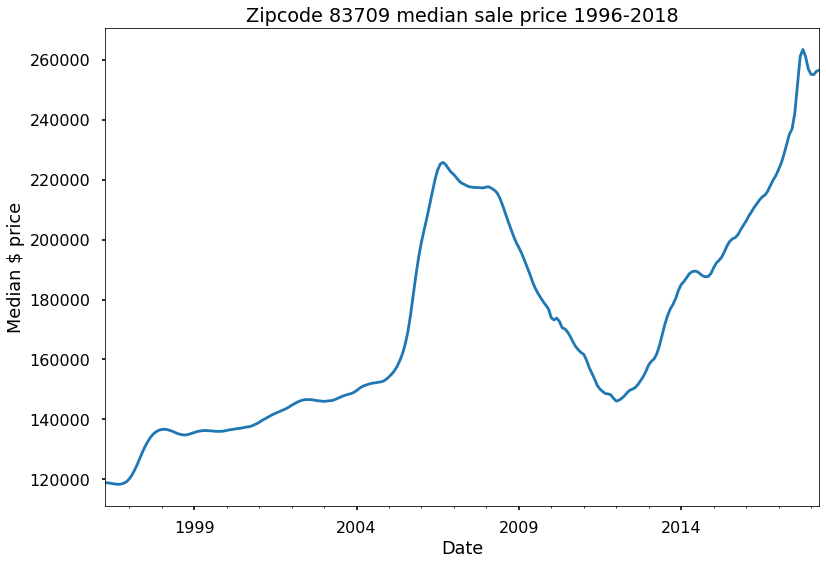

In [42]:
#TEST PLOT A SINGLE ZIPCODE TO MAKE SURE THE DATA SAVED PROPERLY
zip_data[83709].plot();
plt.xlabel('Date')
plt.ylabel('Median $ price')
plt.title("Zipcode 83709 median sale price 1996-2018")
plt.show()

> **Now that we've saved the Ada Country zipcodes into a dictionary, we want to put them back into a dataframe so that we can plot them together to see if any zipcodes stand out from a trend perspective.** 

In [43]:
#TURN THE DICTIONARY INTO A DATAFRAME TO PREPARE FOR VISUALIZATION
df2 = pd.DataFrame(zip_data)
df2.head()

,83709,83704,83706,83705,83702,83616,83713,83714,83703,83716,83712
date,,,,,,,,,,,
1996-04-01,118900.0,94600.0,114600.0,83000.0,145300.0,186100.0,115900.0,120000.0,107500.0,129300.0,160900.0
1996-05-01,118800.0,94500.0,114600.0,83000.0,145100.0,185900.0,115800.0,119900.0,107500.0,129200.0,162000.0
1996-06-01,118700.0,94400.0,114500.0,83000.0,144900.0,185900.0,115800.0,119900.0,107500.0,129200.0,163200.0
1996-07-01,118500.0,94300.0,114400.0,83000.0,144700.0,185900.0,115800.0,119900.0,107500.0,129300.0,164400.0
1996-08-01,118400.0,94400.0,114400.0,83200.0,144600.0,186100.0,116000.0,119900.0,107600.0,129400.0,165600.0


> **Let's only use housing data starting from 2013. Inflation and other historical market events (i.e. the crash in 2008) since the beginning of the data set could skew our models and our forecasts.**

> **Reaching back at least 5 years into the data (2013) ensures that we're able to make forecasts at least another 5 years into the future (2023)- which is as far as we want to go anyway.**

In [44]:
#TRIM DATA TO ONLY INCLUDE HOUSING PRICES FROM 2013-2018

df2 = df2.loc['2013-01-01':, :]

df2.head()

,83709,83704,83706,83705,83702,83616,83713,83714,83703,83716,83712
date,,,,,,,,,,,
2013-01-01,158200.0,134800.0,160000.0,124600.0,263100.0,298900.0,159200.0,167700.0,150800.0,216300.0,284800.0
2013-02-01,159400.0,135200.0,161000.0,125300.0,263300.0,302300.0,159800.0,168100.0,151500.0,217900.0,285300.0
2013-03-01,160200.0,136300.0,163300.0,126700.0,263600.0,305200.0,161700.0,169400.0,152900.0,219700.0,287300.0
2013-04-01,161900.0,138100.0,166400.0,128700.0,265500.0,308200.0,165200.0,172900.0,155800.0,221600.0,291500.0
2013-05-01,164700.0,140100.0,170200.0,130300.0,269200.0,311400.0,168500.0,177300.0,158700.0,225300.0,296600.0


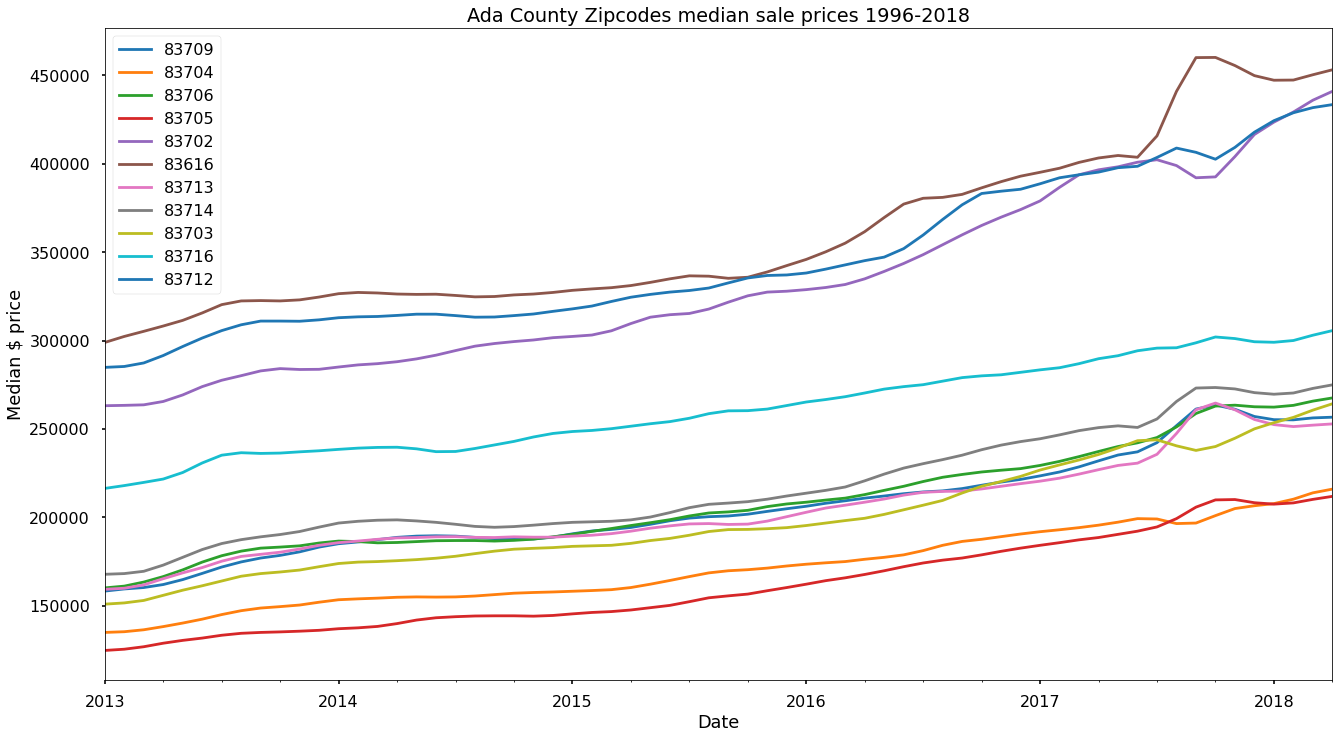

In [45]:
#PLOT ALL THE ZIPCODES ON ONE GRAPH TO LOOK FOR MACRO TRENDS/ANOMALIES
df2.plot(legend=True, figsize = (22,12))
plt.xlabel('Date')
plt.ylabel('Median $ price')
plt.title("Ada County Zipcodes median sale prices 1996-2018")
plt.show()

> **Our time series data are non-stationary and have a positive trend.**

> **We will need to address this before modeling our data, but first let's decompose the time series for one zipcode to get a better understanding of our non-stationary data set.**

In [46]:
#IMPORT STATSMODELS TOOLS TO ANALYIZE TIME SERIES DATA

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
import matplotlib as mpl

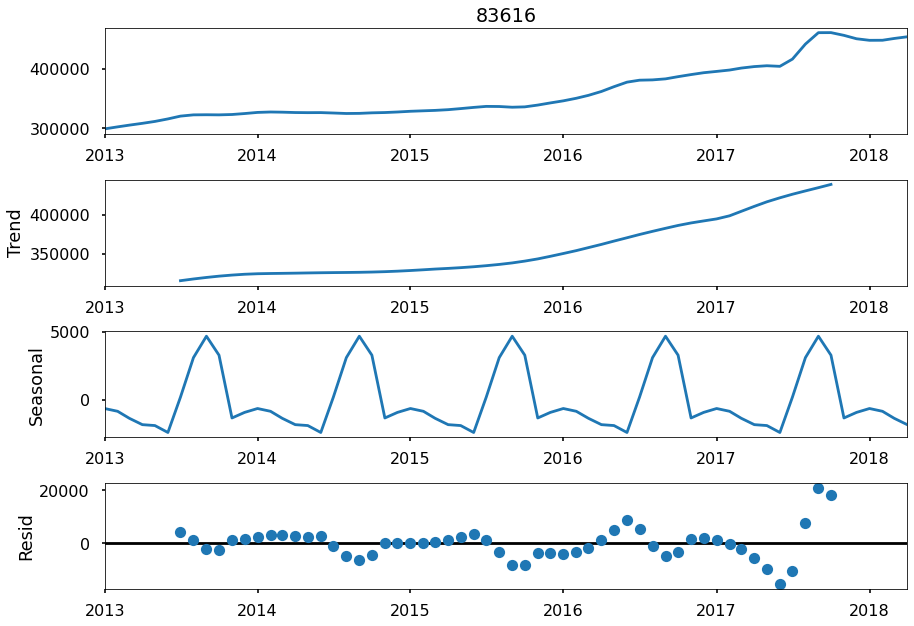

In [47]:
#TAKE A LOOK AT TREND, SEASONALITY, AND RESIDUALS FOR ONE ZIPCODE

zipcode = 83616
ts = df2[zipcode].copy()
ts_result = seasonal_decompose(ts, model='additive')
ts_result.plot();


> **We clearly have a positive trend and seasonal component to our median housing prices that we'll need to take into account in our modeling and forecasting.**

> - **To deal with the trend and seasonality, we'll use auto_arima to select the right p, q, and d parameters to give us the best model.** 

# MODEL

> **As with all machine learning modeling, we'll need to split our data into training and test sets. With time series, it can be helpful to visualize the train-test split using the below visualization.**

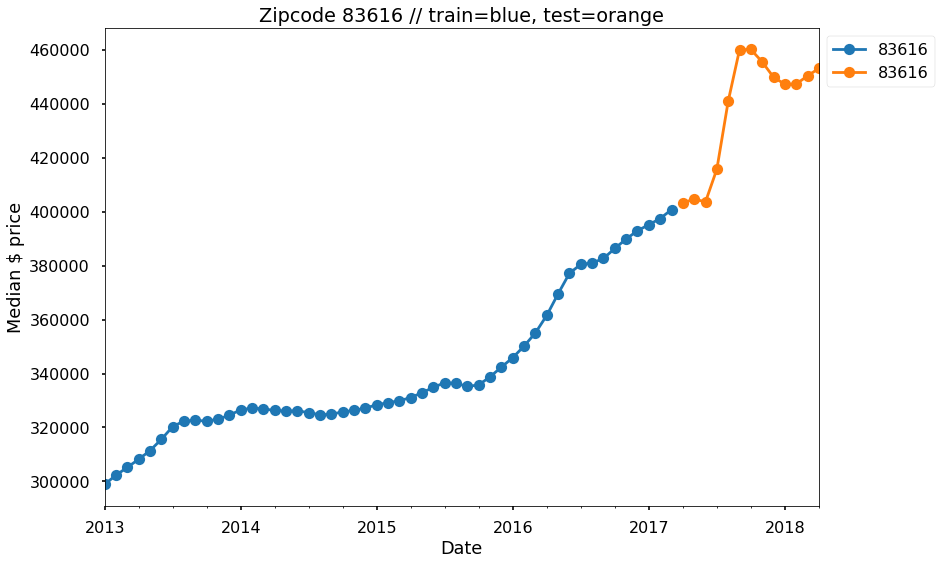

In [48]:
# TRAIN TEST SPLIT INDEX
#CODE ADAPTED FROM JAMES' LECTURE NOTES

train_size = 0.8
split_idx = round(len(ts) * train_size)
split_idx

# SPLIT
train = ts.iloc[:split_idx]
test = ts.iloc[split_idx:]

#VISUALIZE TRAIN TEST SPLIT
fig, ax = plt.subplots()
kws = dict(ax=ax,marker='o')
train.plot(**kws)
test.plot(**kws)
plt.xlabel('Date')
plt.ylabel('Median $ price')
plt.title("Zipcode 83616 // train=blue, test=orange")
ax.legend(bbox_to_anchor=[1,1]);

> - **The blue dots indicate our training data and the orange dots indicate test data.**

> **Now let's build a function to plot our prediction results along side our training and test data. This will give us perspective on how our predictions and forecasts compare to the rest of our data.**

In [49]:
#CODE ADAPTED FROM JAMES' LECTURE NOTES

def plot_train_test_pred(train, test, pred_df):
    '''Function to plot prediction results'''
    
    fig, ax = plt.subplots()
    kws = dict(marker='o')
    
    ax.plot(train, label='Train', **kws)
    ax.plot(test, label='Test', **kws)
    ax.plot(pred_df['prediction'], label='Prediction', ls='--', **kws)
    ax.set(ylabel="Median price - $ USD", xlabel='Date')
    
    ax.fill_between(x=pred_df.index, y1=pred_df['lower'], y2=pred_df['upper'])
    ax.legend(bbox_to_anchor=[1,1])
    fig.tight_layout()
    return fig,ax

> - **Now we'll use auto_arima for parameter selection.**
> - **auto_arima is essentially a grid search to determine the best parameters p, d, and q to deal with the positive trend and seasonality in our non-stationary time series data.**


In [50]:
#IMPORT auto_arima AND SARIMAX LIBRARIES
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import metrics


In [51]:
#CODE ADAPTED FROM JAMES' LECTURE NOTES

def forecast_to_df(forecast, zipcode):
    '''Function to forecast prices and store them in a dataframe'''
    
    test_pred = forecast.conf_int()
    test_pred[zipcode] = forecast.predicted_mean
    test_pred.columns = ['lower', 'upper', 'prediction']
    return test_pred


> **Now let's put all of our tools together and use dynamic forecasting to predict the median home prices for all zipcodes in Ada County from May 2018 - April 2023.**

> **Using these predictions, we'll be able to determine which zipcodes have the lowest risk and are therefore the best investment.**

ZIPCODE:  83709


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  83709   No. Observations:                   48
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -385.738
Date:                Mon, 21 Dec 2020   AIC                            777.477
Time:                        21:20:00   BIC                            783.027
Sample:                    01-01-2013   HQIC                           779.566
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9842      0.009    107.570      0.000       0.966       1.002
ma.L1         -0.9666      0.013    -71.804      0.000      -0.993      -0.940
sigma2      7.852e+05   1.12e-09   7.03e+14      0.000    7.85e+05    7.85e+05
===================================================================================
Ljung-Box (L1) (Q):                  32.09   Jarque-Bera (JB):                 2.06
Prob(Q):                              0.00   Prob(JB):                         0.36
Heteroskedasticity (H):               0.34   Skew:                            -0.51
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.52e+29. Standard errors may be unstable.
"""

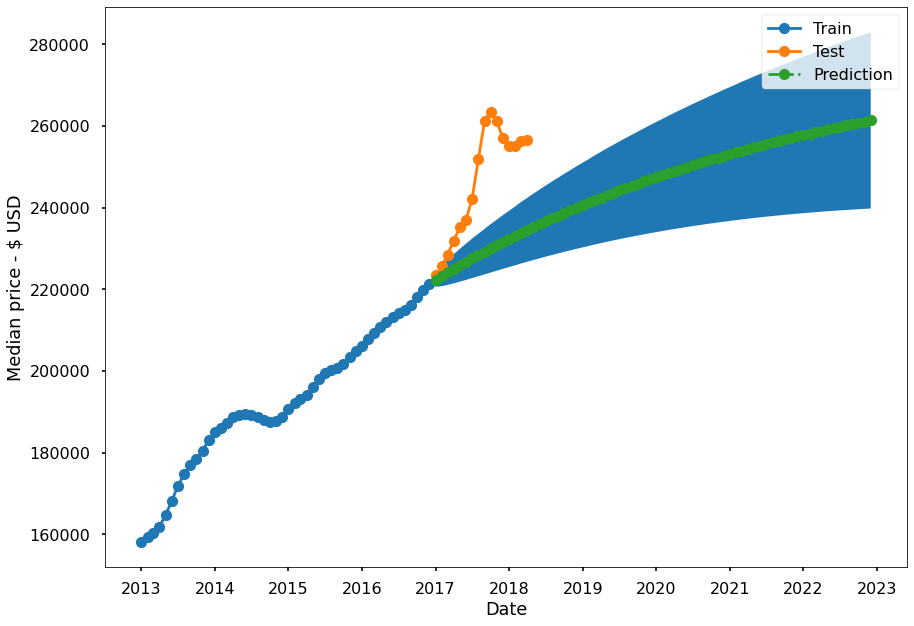

------------------------------------------------------------------------------------------

ZIPCODE:  83704


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  83704   No. Observations:                   48
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -407.046
Date:                Mon, 21 Dec 2020   AIC                            816.091
Time:                        21:20:01   BIC                            817.942
Sample:                    01-01-2013   HQIC                           816.788
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.923e+06   5.21e+05      3.692      0.000    9.02e+05    2.94e+06
===================================================================================
Ljung-Box (L1) (Q):                  30.62   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.00   Prob(JB):                         0.30
Heteroskedasticity (H):               1.08   Skew:                             0.44
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

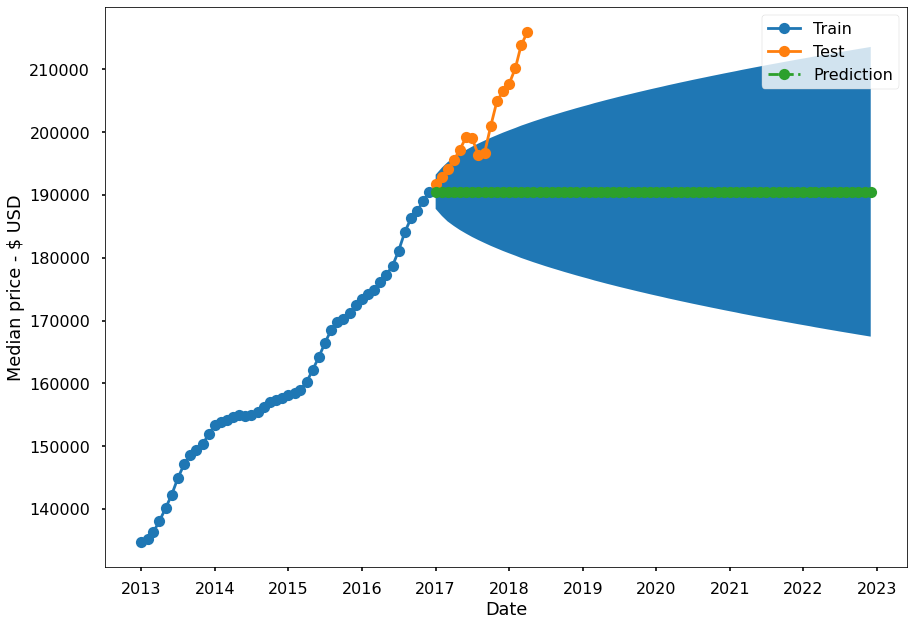

------------------------------------------------------------------------------------------

ZIPCODE:  83706


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  83706   No. Observations:                   48
Model:               SARIMAX(5, 1, 2)   Log Likelihood                -393.664
Date:                Mon, 21 Dec 2020   AIC                            803.329
Time:                        21:20:05   BIC                            818.130
Sample:                    01-01-2013   HQIC                           808.898
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0050      0.031      0.160      0.873      -0.056       0.066
ar.L2          1.0217      0.018     57.538      0.000       0.987       1.057
ar.L3          0.0247      0.139      0.177      0.859      -0.248       0.297
ar.L4         -0.0229      0.028     -0.831      0.406      -0.077       0.031
ar.L5         -0.0284      0.129     -0.220      0.826      -0.281       0.224
ma.L1         -0.0008      0.164     -0.005      0.996      -0.322       0.320
ma.L2         -0.9987      0.163     -6.126      0.000      -1.318      -0.679
sigma2      6.789e+05      5e-07   1.36e+12      0.000    6.79e+05    6.79e+05
===================================================================================
Ljung-Box (L1) (Q):                  28.78   Jarque-Bera (JB):                 4.37
Prob(Q):                              0.00   Prob(JB):                         0.11
Heteroskedasticity (H):               0.24   Skew:                             0.62
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.35e+26. Standard errors may be unstable.
"""

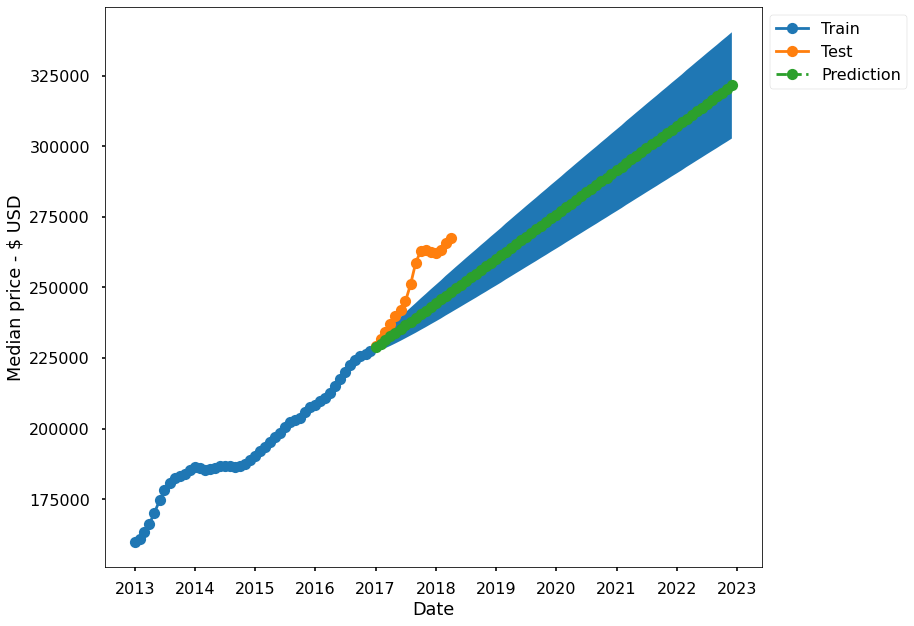

------------------------------------------------------------------------------------------

ZIPCODE:  83705


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  83705   No. Observations:                   48
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -343.421
Date:                Mon, 21 Dec 2020   AIC                            692.843
Time:                        21:20:06   BIC                            698.328
Sample:                    01-01-2013   HQIC                           694.898
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0444      0.085     -0.525      0.600      -0.210       0.121
ma.L2         -0.0441      0.083     -0.533      0.594      -0.206       0.118
sigma2      1.763e+05   4.77e+04      3.695      0.000    8.28e+04     2.7e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.67   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.20   Prob(JB):                         0.89
Heteroskedasticity (H):               0.84   Skew:                            -0.00
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

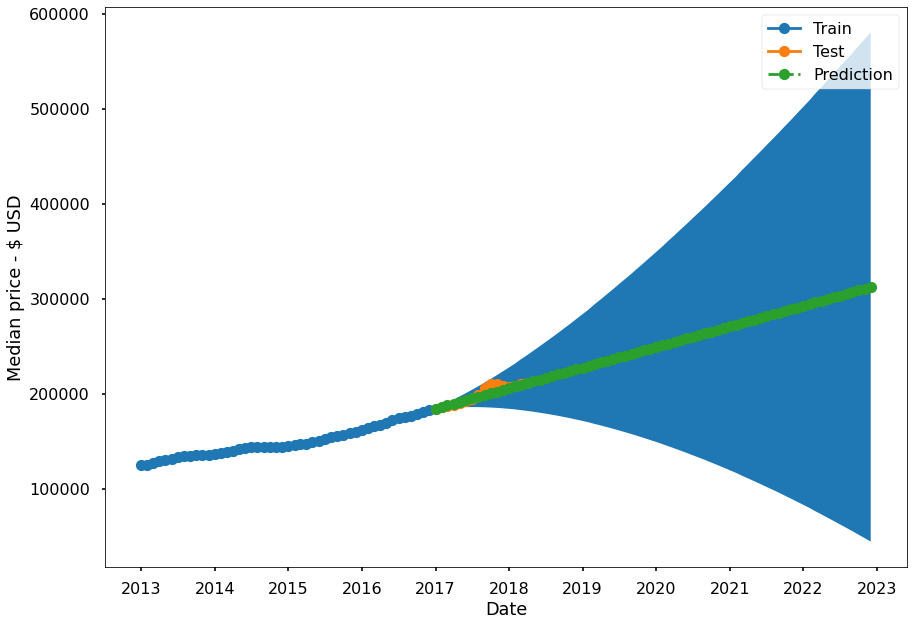

------------------------------------------------------------------------------------------

ZIPCODE:  83702


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  83702   No. Observations:                   48
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -382.589
Date:                Mon, 21 Dec 2020   AIC                            767.178
Time:                        21:20:07   BIC                            769.006
Sample:                    01-01-2013   HQIC                           767.863
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.795e+05   2.37e+05      4.127      0.000    5.14e+05    1.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   8.24   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.00   Prob(JB):                         0.73
Heteroskedasticity (H):               0.60   Skew:                            -0.17
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

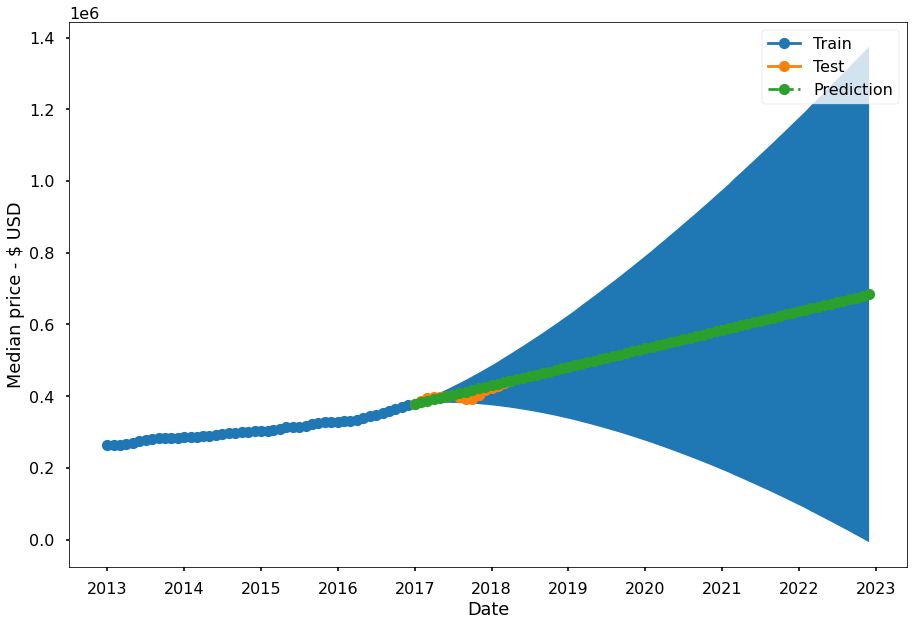

------------------------------------------------------------------------------------------

ZIPCODE:  83616


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  83616   No. Observations:                   48
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -441.697
Date:                Mon, 21 Dec 2020   AIC                            885.393
Time:                        21:20:07   BIC                            887.243
Sample:                    01-01-2013   HQIC                           886.090
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.339e+06   1.47e+06      5.675      0.000    5.46e+06    1.12e+07
===================================================================================
Ljung-Box (L1) (Q):                  33.89   Jarque-Bera (JB):                 6.59
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               3.21   Skew:                             0.88
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

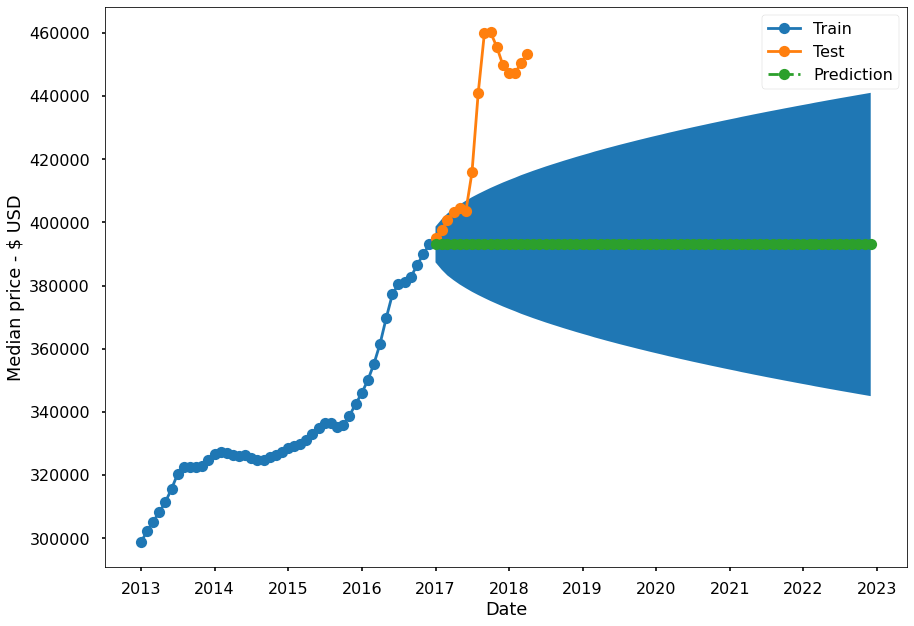

------------------------------------------------------------------------------------------

ZIPCODE:  83713


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  83713   No. Observations:                   48
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -389.075
Date:                Mon, 21 Dec 2020   AIC                            788.150
Time:                        21:20:10   BIC                            797.401
Sample:                    01-01-2013   HQIC                           791.632
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8544      0.066     12.957      0.000       0.725       0.984
ar.L2          0.0170      0.053      0.324      0.746      -0.086       0.120
ar.L3          0.0271      0.045      0.606      0.545      -0.061       0.115
ma.L1         -0.8503      0.060    -14.141      0.000      -0.968      -0.732
sigma2      8.376e+05   1.35e-08   6.22e+13      0.000    8.38e+05    8.38e+05
===================================================================================
Ljung-Box (L1) (Q):                  29.95   Jarque-Bera (JB):                 2.88
Prob(Q):                              0.00   Prob(JB):                         0.24
Heteroskedasticity (H):               7.18   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.48e+29. Standard errors may be unstable.
"""

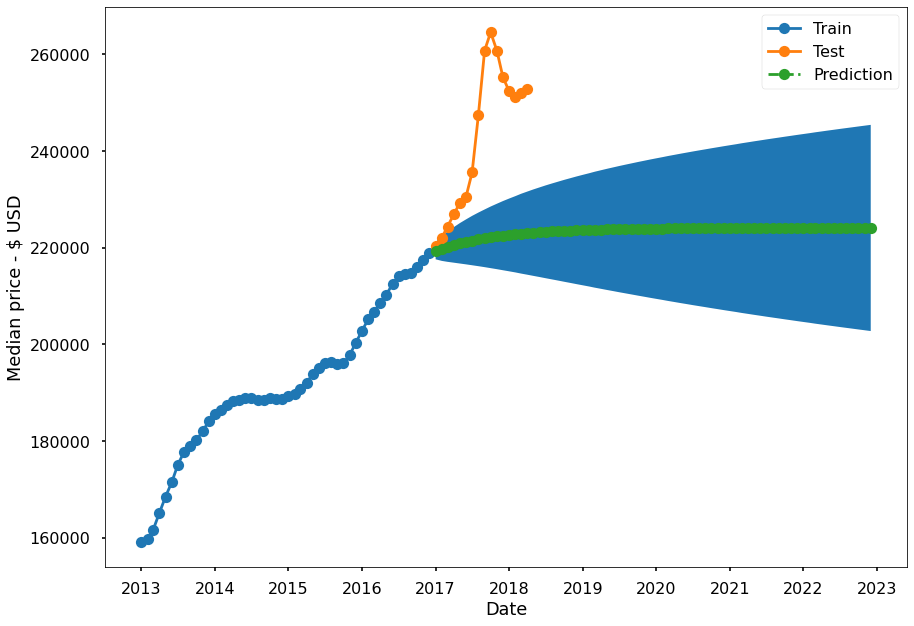

------------------------------------------------------------------------------------------

ZIPCODE:  83714


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  83714   No. Observations:                   48
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -426.294
Date:                Mon, 21 Dec 2020   AIC                            854.589
Time:                        21:20:11   BIC                            856.439
Sample:                    01-01-2013   HQIC                           855.285
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.351e+06   1.12e+06      3.890      0.000    2.16e+06    6.54e+06
===================================================================================
Ljung-Box (L1) (Q):                  36.53   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.00   Prob(JB):                         0.79
Heteroskedasticity (H):               1.02   Skew:                            -0.00
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

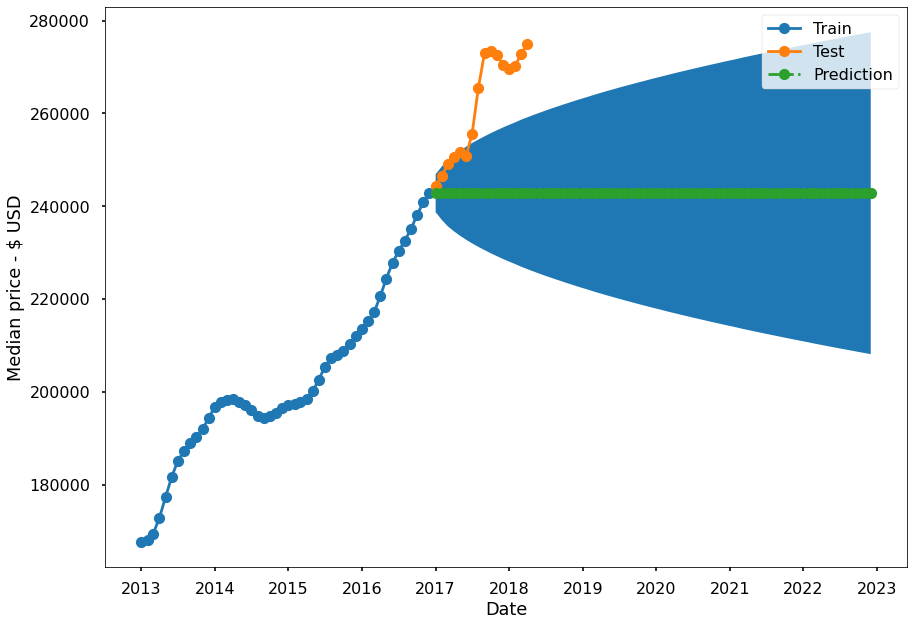

------------------------------------------------------------------------------------------

ZIPCODE:  83703


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  83703   No. Observations:                   48
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -419.549
Date:                Mon, 21 Dec 2020   AIC                            841.098
Time:                        21:20:12   BIC                            842.948
Sample:                    01-01-2013   HQIC                           841.794
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.268e+06   8.17e+05      3.999      0.000    1.67e+06    4.87e+06
===================================================================================
Ljung-Box (L1) (Q):                  31.09   Jarque-Bera (JB):                 3.75
Prob(Q):                              0.00   Prob(JB):                         0.15
Heteroskedasticity (H):               1.56   Skew:                             0.68
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

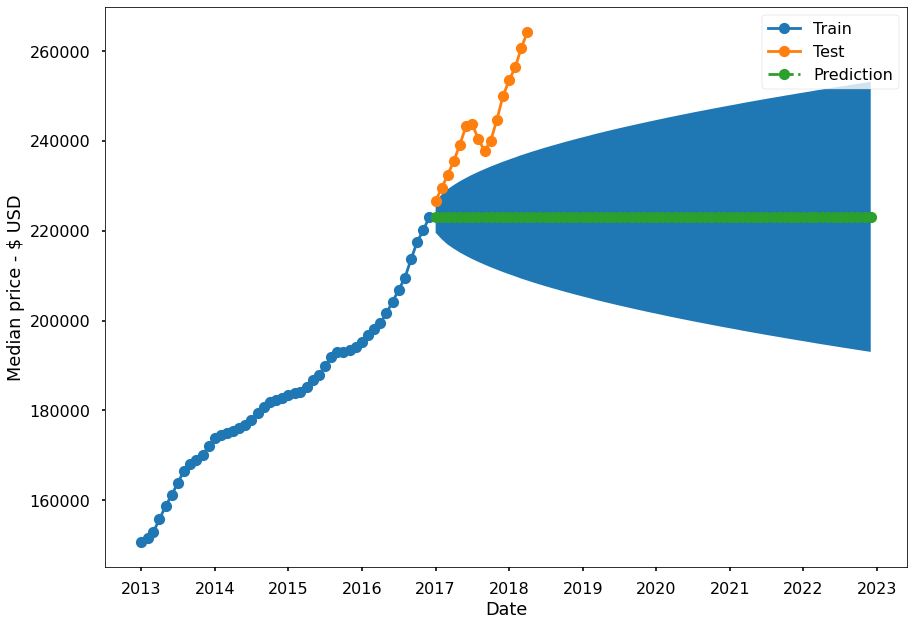

------------------------------------------------------------------------------------------

ZIPCODE:  83716


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  83716   No. Observations:                   48
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -419.908
Date:                Mon, 21 Dec 2020   AIC                            841.816
Time:                        21:20:13   BIC                            843.666
Sample:                    01-01-2013   HQIC                           842.512
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.318e+06    6.3e+05      5.269      0.000    2.08e+06    4.55e+06
===================================================================================
Ljung-Box (L1) (Q):                  24.84   Jarque-Bera (JB):                14.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             0.66
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

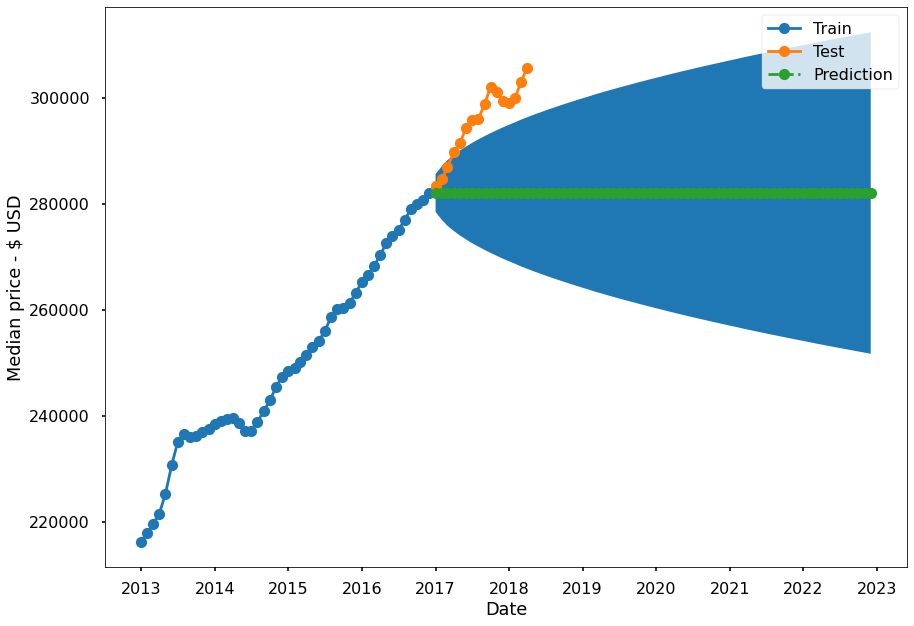

------------------------------------------------------------------------------------------

ZIPCODE:  83712


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  83712   No. Observations:                   48
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -444.382
Date:                Mon, 21 Dec 2020   AIC                            890.764
Time:                        21:20:13   BIC                            892.614
Sample:                    01-01-2013   HQIC                           891.460
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.348e+06   1.45e+06      6.447      0.000    6.51e+06    1.22e+07
===================================================================================
Ljung-Box (L1) (Q):                  34.21   Jarque-Bera (JB):                19.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                             1.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

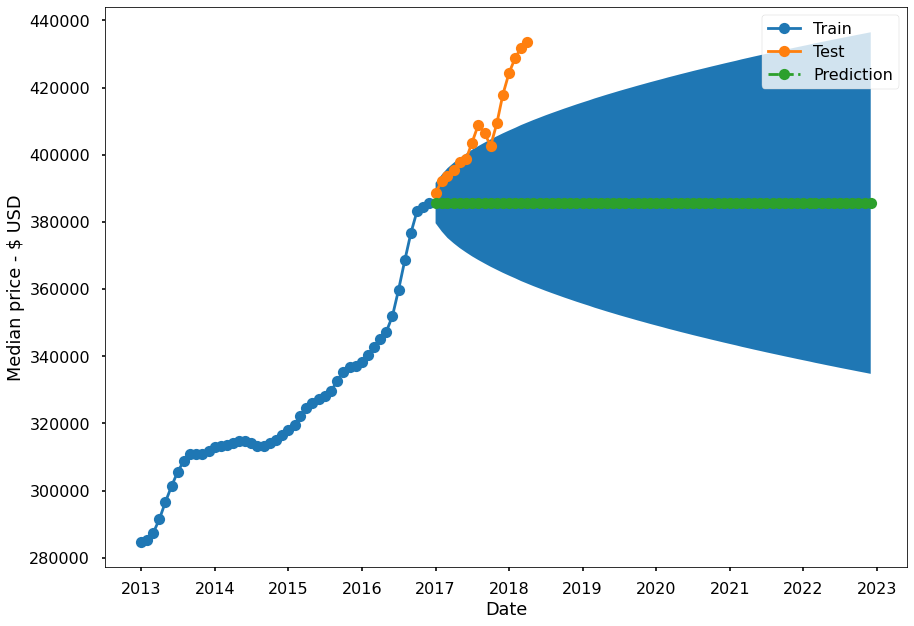

------------------------------------------------------------------------------------------



In [52]:
#USE DYNAMIC FORCASTING TO PREDICT HOUSE PRICES 5 YEARS INTO THE FUTURE
#CODE ADAPTED FROM JAMES' LECTURE NOTES

#CREATE AN EMPTY DICTIONARY TO STORE THE MODELING RESULTS
RESULTS = {}

for zipcode in zipcode_list:
    '''Forecast mean home values for each zipcode in Ada County, Idaho
    from May 2017 - Decemeber 2022'''
    
    print("ZIPCODE: ", zipcode)

    # MAKE EMPTY DICTIONARY FOR ZIPCODE DATA
    zipcode_z = {}

    # COPY TIME SERIES DATAFRAME
    ts = df2[zipcode].copy()

    # TRAIN TEST SPLIT INDEX
    train_size = 0.75
    split_idx = round(len(ts) * train_size)
    split_idx

    # SPLIT
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # GET BEST PARAMS USING AUTO ARIMA
    gs_model = auto_arima(train, start_p=0, start_q=0)
    
    #MODEL USING SARIMAX
    best_model = SARIMAX(train, order=gs_model.order, 
                         seasonal_order=gs_model.seasonal_order).fit()

    # GET PREDICTIONS FOR 5 YEARS IN ADVANCE (2017-2022)
    ## DATA IS SAMPLED MONTHY FROM THE TRAIN/TEST SPLIT (ROUGHLY AROUND 2017)
    ### THEREFORE TO GET TO 2023 FROM 2017 IS 12x6 = 72 MONTHS(steps)
    pred = best_model.get_forecast(steps=72)
    pred_df = forecast_to_df(pred, zipcode)

  
    # SAVE INFO TO DICTIONARY
    zipcode_z['pred_df'] = pred_df
    zipcode_z['model'] = best_model
    zipcode_z['train'] = train
    zipcode_z['test'] = test

    # DISPLAY RESULTS
    display(best_model.summary())
    plot_train_test_pred(train, test, pred_df)
    plt.show()

    # SAVE ZIPCODE DICTIONARY IN RESULTS DICTIONARY FOR FUTURE USE

    RESULTS[zipcode] = zipcode_z
    print('---'*30, end='\n\n')



# iNTERPRET

> **To evaluate our predictions, let's rank each zipcode's model from lowest Akaike Information Criterion (AIC) to the highest. It's important to note that AIC values are only meaningful when compared to each other and not off of raw magnitude.**

83705- AIC: 692.843  
83702- AIC: 767.178  
83709- AIC: 777.477  
83713- AIC: 788.150   
83706- AIC: 803.329  
83704- AIC: 816.091  
83703- AIC: 841.098  
83716- AIC: 841.816  
83714- AIC: 854.589  
83616- AIC: 885.393  
83712- AIC: 890.764  

> "The AIC is a model selection tool that strikes a balance between goodness-of-fit i.e. how well a model fits a data set, and how badly it over-fits it in its effort to fit the data set."

> "A lower score indicates that the model has a superior capacity to balance goodness-of-fit with the risk of over-fitting the data set."



> Source: https://timeseriesreasoning.com/2019/11/16/how-to-select-a-regression-model-using-aic/



# CONCLUSIONS AND RECOMMENDATIONS

> **Our AIC scores are all relatively close, but it clear from the plots that some of our models are fitting poorly, and thus are not going to make very accurate forecasts into the future.**

> **The top five lowest risk zip codes to invest in based off 5-year forecasts are:**

> 1. 83706
> 2. 83709
> 3. 83713
> 4. 83704
> 5. 83616

> **We determined this by looking at our blue confidence intervals. If the lower bound of our confidence interval dipped below the starting price, that was considered a higher risk investment.**

> **This means that you are least likely to lose your money and most likely to increase your ROI by investing in these zip codes.**



## FUTURE WORK

> - **Dig deeper into auto_arima to see if there are better options for hyper parameter tuning to improve our models' fit.**

> - **Get more recent data (the current data set only includes dates up to April 2018) to be able to forecast more accurately into the future.**

> - **Research other data preprocessing techniques to see if we can improve model performance and forecasts.**